
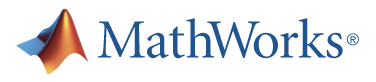
https://nl.mathworks.com/help/curvefit/smoothing-data.html
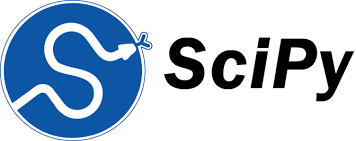
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.signal import lfilter
from scipy.integrate import odeint
from scipy.optimize import minimize
import math

In [2]:
url = "https://raw.githubusercontent.com/ADelau/proj0016-epidemic-data/main/data.csv"
# Import the dataframe:
raw_dataset = pd.read_csv(url, sep=',', header=0)

# MAS Smoothing:
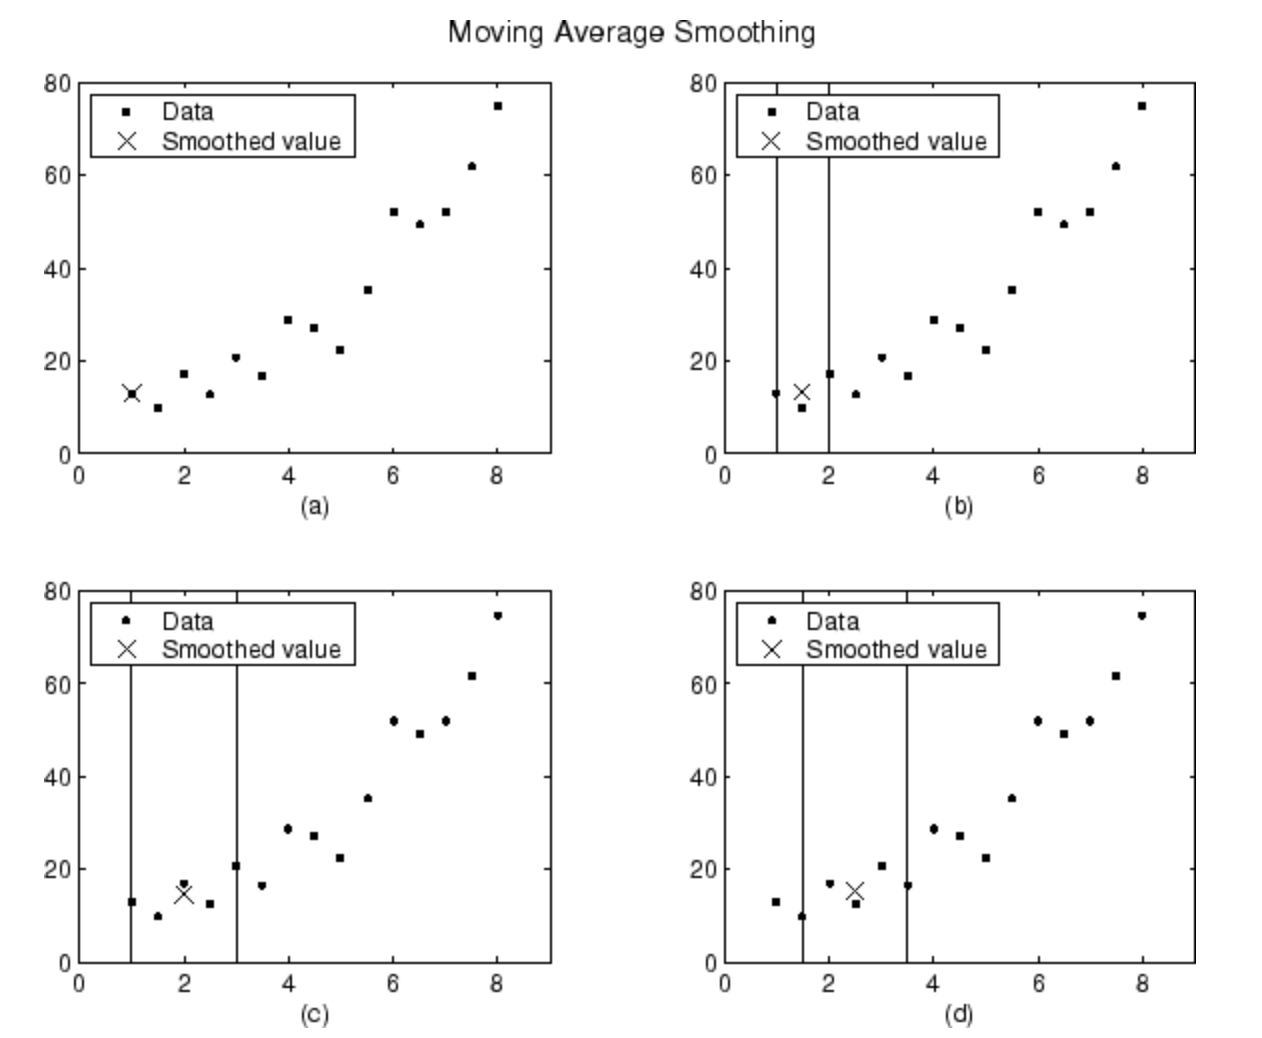

Own_MAS is an implementation of the smoothing described in the figures above. It consist in a moving window, which size is reduced when reaching boundaries.

In [3]:
def own_MAS_index(vector, window, index):
    
    smoothed_value = 0
    max_size = (window - 1) / 2
    
    #cas de base
    if(window == 1):
        smoothed_value = vector[index]
        
    #case not boundaries
    elif ((index - max_size) >= 0) and ((index + max_size) <= len(vector) - 1):
        smoothing_window = np.arange(-max_size,max_size+1,1)
        for j in range(window):
            smoothed_value += vector[int(index + smoothing_window[j])] / window
            
    #recusivité       
    else:
        return own_MAS_index(vector, window - 2, index)
        
    return smoothed_value



def own_MAS(vector, window):
    
    smoothed_vector = np.zeros(len(vector))
    
    if (window % 2) == 0:
        print("Error window size even")
        return
    
    for i in range(len(vector)):
        smoothed_vector[i] = own_MAS_index(vector, window, i)
    
    return smoothed_vector
            
                
        

# NRMAS Smoothing:
NRMAS : Not Reducing Window, the widow size doesn't change but unreachable indices are ignored and the median is computed on less values

In [4]:
def own_NRMAS_index(vector, window, index):
    
    smoothed_value = 0
    nb_considered_values = 0
    max_size = (window - 1) / 2
    smoothing_window = np.arange(-max_size,max_size+1,1)
    
    for j in range(window):
        
        sliding_index = int(index + smoothing_window[j])
        
        
        if (sliding_index >= 0) and (sliding_index <= len(vector) - 1):
            smoothed_value += vector[sliding_index]
            nb_considered_values += 1
        
    return smoothed_value / nb_considered_values



def own_NRMAS(vector, window):
    
    smoothed_vector = np.zeros(len(vector))
    
    if (window % 2) == 0:
        print("Error window size even")
        return
    
    for i in range(len(vector)):
        smoothed_vector[i] = own_NRMAS_index(vector, window, i)
    
    return smoothed_vector
            

In [5]:
np_df = raw_dataset.to_numpy()

smt_prd = 7
smt_vec = np.ones(smt_prd)
smt_vec /= smt_prd

smoothed = np.copy(np_df)
smoothed2 = np.copy(np_df)
smoothed3 = np.copy(np_df)
smoothed4 = np.copy(np_df)
smoothedf = np.copy(np_df)
smoothedown_MAS = np.copy(np_df)
smoothedown_NRMAS = np.copy(np_df)
nb_per = math.floor(np_df.shape[0] / smt_prd)

for i in range(1, np_df.shape[1]):
    
    smoothed[:, i] = np.convolve(np_df[:, i], smt_vec, mode='same')
    smoothed2[:, i] = savgol_filter(np_df[:, i], smt_prd, 1)
    smoothed3[:, i] = savgol_filter(np_df[:, i], smt_prd, 2)
    smoothed4[:, i] = savgol_filter(np_df[:, i], smt_prd, 3)
    smoothed4[:, i] = savgol_filter(np_df[:, i], smt_prd, 3)
    smoothedf[:, i] = lfilter(smt_vec, 1, np_df[:,i])
    smoothedown_MAS[:, i] = own_MAS(np_df[:,i], 7)
    smoothedown_NRMAS[:, i] = own_NRMAS(np_df[:,i], 7)
    
    
    for j in range(smoothed.shape[0] - int((smt_prd - 1) / 2), smoothed.shape[0]):
        
        smoothed[j][i] = np_df[j][i]

# Convolve, svagol, lfilter:


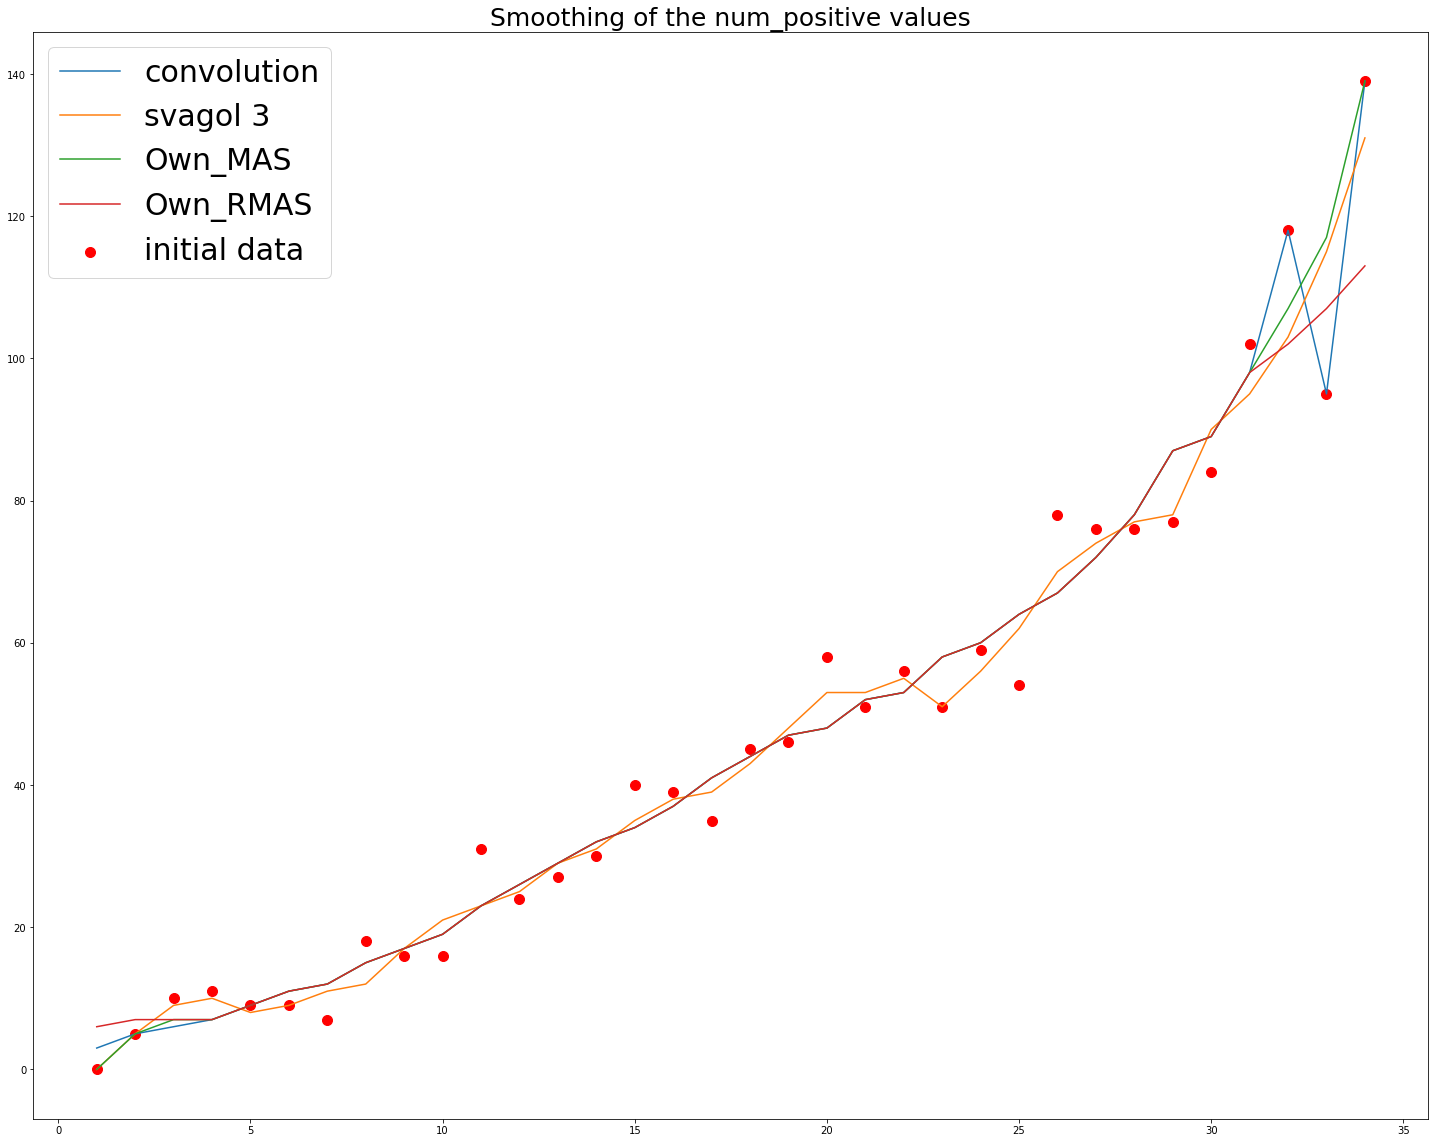

In [6]:
fig = plt.figure(figsize=(25,20))
plt.scatter(np_df[:,0], np_df[:,1], color='red', s=100, label='initial data')
plt.plot(smoothed[:,0], smoothed[:,1], label='convolution')
#plt.plot(smoothed2[:,0], smoothed2[:,1], label='svagol 1')
#plt.plot(smoothed3[:,0], smoothed3[:,1], label='svagol 2')
plt.plot(smoothed4[:,0], smoothed4[:,1], label='svagol 3')
#plt.plot(smoothedf[:,0], smoothedf[:,1], label='lfilter')
plt.plot(smoothedown_MAS[:,0], smoothedown_MAS[:,1], label='Own_MAS')
plt.plot(smoothedown_NRMAS[:,0], smoothedown_NRMAS[:,1], label='Own_RMAS')
plt.legend(fontsize=30)
plt.title('Smoothing of the num_positive values', fontsize=25)
plt.savefig('Smoothing.png')

#print(np_df[:,1])
#print(smoothed[:,1])